<a href="https://colab.research.google.com/github/kittipong-tar/dads-project/blob/main/DADS_5001_Kittipong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns

In [5]:
airbnb_df = pd.read_csv('https://raw.githubusercontent.com/nnut21/DADS5001_Data_Analysis/refs/heads/main/dataset/listings.csv')

In [7]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18879 entries, 0 to 18878
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18879 non-null  int64  
 1   name                            18879 non-null  object 
 2   host_id                         18879 non-null  int64  
 3   host_name                       18878 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   18879 non-null  object 
 6   latitude                        18879 non-null  float64
 7   longitude                       18879 non-null  float64
 8   room_type                       18879 non-null  object 
 9   price                           18879 non-null  int64  
 10  minimum_nights                  18879 non-null  int64  
 11  number_of_reviews               18879 non-null  int64  
 12  last_review                     

In [34]:
import numpy as np
conditions = [
    airbnb_df['minimum_nights'] <= 30,
    (airbnb_df['minimum_nights'] >30) & (airbnb_df['minimum_nights'] <=180),
    (airbnb_df['minimum_nights'] >180) & (airbnb_df['minimum_nights'] <=365),
    airbnb_df['minimum_nights'] >365
]

choices = ['not over 1 months', '1 - 6 months', '6 - 12 months', 'more than 12 months']

# Apply case-when logic using numpy.select
airbnb_df['minimum_nights_interpret'] = np.select(conditions, choices, default='Unknown')

In [48]:
airbnb_df['percent_avaiability_per_year'] = airbnb_df['availability_365']/365

In [19]:
cols_select = ['room_type', 'id']
cnt_by_room_type = airbnb_df[cols_select].groupby('room_type').count().reset_index()
cnt_by_room_type.columns = ['room_type', 'number_of_hostid']

In [26]:
def add_data_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

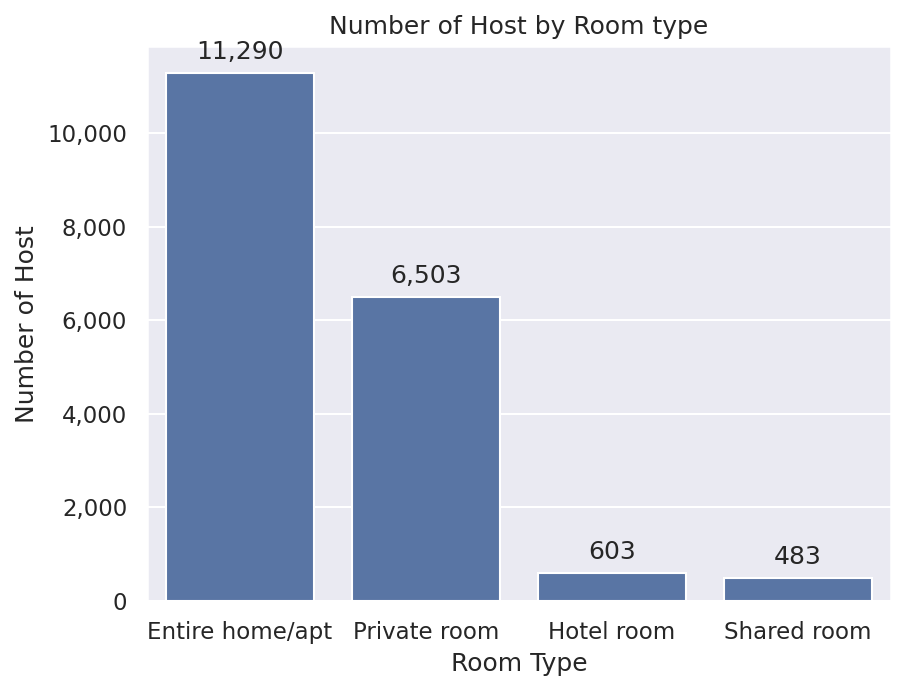

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create the plot
sns.set(rc={'figure.dpi':150})
ax = sns.barplot(
    data=cnt_by_room_type.sort_values(by='number_of_hostid', ascending=False),
    x='room_type',
    y='number_of_hostid'
)
ax.set_title('Number of Host by Room type')
ax.set_xlabel('Room Type')
ax.set_ylabel('Number of Host')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
add_data_labels(ax)
plt.show()

In [28]:
#Box_plot
fig = px.box(airbnb_df,
                x='room_type',
                y='price',
                hover_name='name',
                title='room_type vs. price')
fig.show()

In [36]:
#Box_plot
fig = px.box(airbnb_df,
                x='minimum_nights_interpret',
                y='price',
                hover_name='name',
                title='minimum_nights_interpret vs. price')

fig.show()

In [38]:
cols_select = ['neighbourhood', 'id']
cnt_by_neighbourhood = airbnb_df[cols_select].groupby('neighbourhood').count().reset_index()
cnt_by_neighbourhood.columns = ['neighbourhood', 'number_of_hostid']

In [40]:
cnt_by_neighbourhood['rank'] = cnt_by_neighbourhood['number_of_hostid'].rank(ascending=False)

<ipython-input-51-88a0f643c64a>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



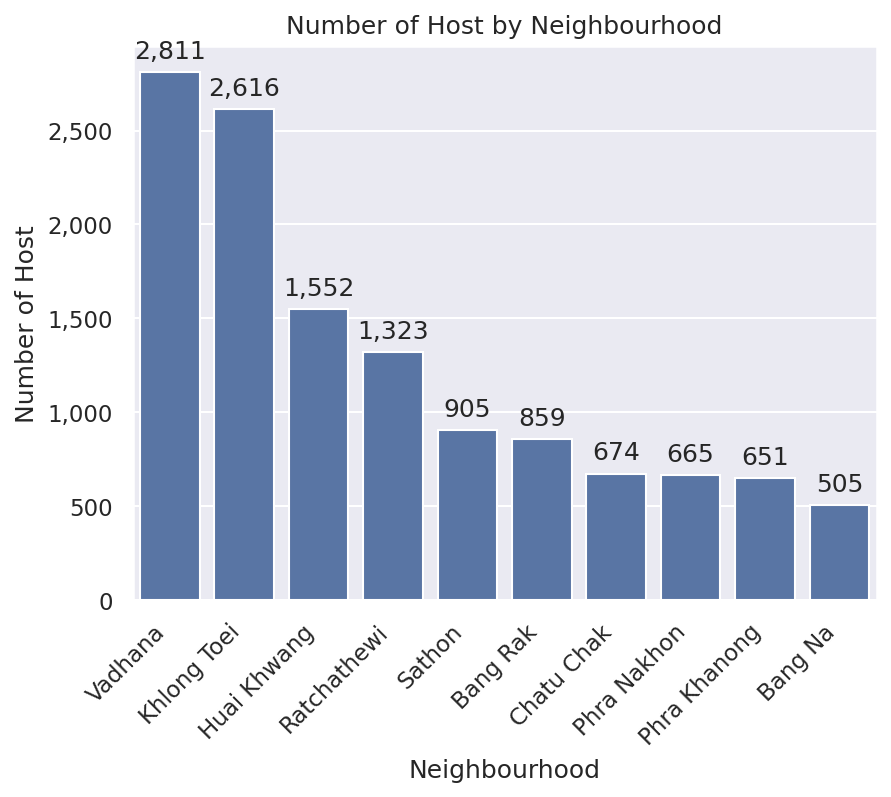

In [51]:
# Create the plot
sns.set(rc={'figure.dpi':150})
ax = sns.barplot(
    data=cnt_by_neighbourhood[cnt_by_neighbourhood['rank']<=10].sort_values(by='number_of_hostid', ascending=False),
    x='neighbourhood',
    y='number_of_hostid'
)
ax.set_title('Number of Host by Neighbourhood')
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Number of Host')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
add_data_labels(ax)
plt.show()

In [49]:
#Box_plot
fig = px.box(airbnb_df,
                x='minimum_nights_interpret',
                y='percent_avaiability_per_year',
                hover_name='name',
                title='minimum_nights_interpret vs. price')

fig.show()

In [ ]:
#Box_plot
fig = px.box(airbnb_df,
                x='minimum_nights_interpret',
                y='percent_avaiability_per_year',
                hover_name='name',
                title='minimum_nights_interpret vs. price')

fig.show()

%avaiability interval